In [1]:
import pandas as pd

#lacal path of data from my computer
body = r"C:\Users\Suat\Documents\Programming\Data Science Project\data.csv"

df = pd.read_csv(body)
df.head()



,borough,closed_date,complaint_type,created_date,incident_address,incident_zip,latitude,longitude,street_name,status
0,BROOKLYN,2015-11-23T10:29:49.000,DOOR/WINDOW,2015-11-07T10:16:55.000,397 1 STREET,11215.0,40.672571,-73.979307,1 STREET,Closed
1,MANHATTAN,2016-01-31T11:50:51.000,DOOR/WINDOW,2015-11-07T18:50:53.000,3851 BROADWAY,10032.0,40.836272,-73.943274,BROADWAY,Closed
2,MANHATTAN,2015-11-20T09:11:31.000,DOOR/WINDOW,2015-11-07T23:09:57.000,3851 BROADWAY,10032.0,40.836272,-73.943274,BROADWAY,Closed
3,BROOKLYN,2015-11-16T12:25:46.000,DOOR/WINDOW,2015-11-07T14:05:52.000,1555 NOSTRAND AVENUE,11226.0,40.648298,-73.949293,NOSTRAND AVENUE,Closed
4,BRONX,2015-12-03T09:38:12.000,DOOR/WINDOW,2015-11-06T13:02:50.000,1808 MULFORD AVENUE,10461.0,40.847490,-73.835112,MULFORD AVENUE,Closed


## '''Question 1: Which type of complaint should the Department of Housing Preservation and Development of New York City focus on first?'''

'''Notes on Problem 1: In the first question, we should look the 311 data set. 311 service is for New York
citizens where citizens can report non-emergency requests from the city.
Important note: The actual dataset is much bigger than this one and can be downloaded from the link I've provided in README file, however I selected the columns that I am going to use. I didn't choose the all recommended columns because of size issues.
The dataset is in data.csv file and transferred here as df, using pandas.
For answering question 1, we should find the column that contains complaint type information and find the 
complaint type that has occured most.'''

First, lets look at the dataset

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5583182 entries, 0 to 5583181
Data columns (total 10 columns):
borough             object
closed_date         object
complaint_type      object
created_date        object
incident_address    object
incident_zip        float64
latitude            float64
longitude           float64
street_name         object
status              object
dtypes: float64(3), object(7)
memory usage: 426.0+ MB


As we can see, there are 10 columns and complaint_type column is over there for our problem.

In [3]:
##Let's look complaint types more detailly

In [4]:
df["complaint_type"].unique()

array(['DOOR/WINDOW', 'SAFETY', 'HEAT/HOT WATER', 'PLUMBING', 'APPLIANCE',
       'UNSANITARY CONDITION', 'WATER LEAK', 'ELECTRIC',
       'FLOORING/STAIRS', 'ELEVATOR', 'GENERAL', 'PAINT/PLASTER',
       'OUTSIDE BUILDING', 'HPD Literature Request', 'AGENCY', 'HEATING',
       'NONCONST', 'GENERAL CONSTRUCTION', 'PAINT - PLASTER',
       'CONSTRUCTION', 'STRUCTURAL', 'VACANT APARTMENT'], dtype=object)

Now we know what kind of complaints in the column, it's a good quick look.

In [5]:
##Even if we can see that there is no NaN values from the unique array, let's double check.
df["complaint_type"].isnull().sum()

0

In [6]:
##Let's find out the amount of each complaints.
df["complaint_type"].value_counts()

HEAT/HOT WATER            1073045
HEATING                    887869
PLUMBING                   676178
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       393855
PAINT - PLASTER            361258
PAINT/PLASTER              313754
ELECTRIC                   290574
NONCONST                   260890
DOOR/WINDOW                181400
WATER LEAK                 169553
GENERAL                    133106
FLOORING/STAIRS            123799
APPLIANCE                  102478
HPD Literature Request      52738
SAFETY                      44550
OUTSIDE BUILDING             6551
ELEVATOR                     5610
CONSTRUCTION                 5078
STRUCTURAL                     16
AGENCY                          9
VACANT APARTMENT                8
Name: complaint_type, dtype: int64

It is clear that the Heat/Hot Water problem is the one that NYC should focus on first! However, it's tricky. You may notice that there is big similarity between two groups. HEAT/HOT WATER and HEATING. Before 2014, this dataset is using HEATING label but after 2014, the label changed as "HEATING/HOT WATER". So, we need to change "HEATING" labels as "HEATING/HOT WATER" and analyze them together.

In [7]:
import numpy as np
df['complaint_type'] = np.where(df['complaint_type']=='HEATING','HEAT/HOT WATER',df['complaint_type'])

In [8]:
#Let's check again
df["complaint_type"].value_counts().head()

HEAT/HOT WATER          1960914
PLUMBING                 676178
GENERAL CONSTRUCTION     500863
UNSANITARY CONDITION     393855
PAINT - PLASTER          361258
Name: complaint_type, dtype: int64

In [9]:
#Let's look at the complaint types in a bar graph
#First, import the matplotlib library
import matplotlib.pyplot as plt

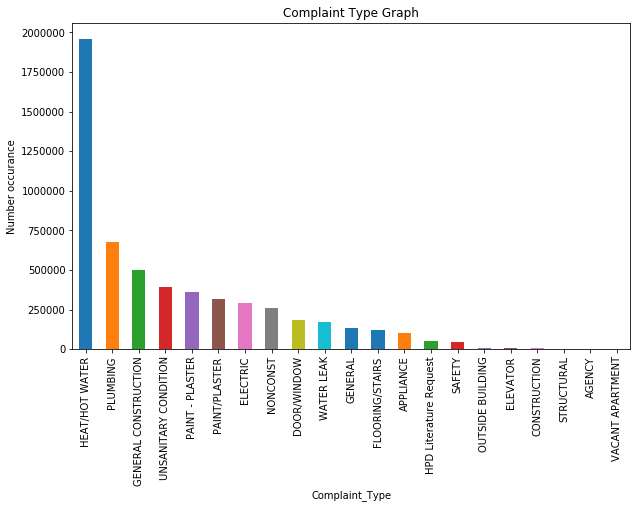

In [10]:
df["complaint_type"].value_counts().plot(kind='bar', figsize=(10, 6))
#
plt.xlabel('Complaint_Type') # add to x-label to the plot
plt.ylabel('Number occurance') # add y-label to the plot
plt.title('Complaint Type Graph') # add title to the plot
#
plt.show()

For Additional Insight, Let's look at how many Heat/Hot Water Problem has occured every year.

For looking at yearly counts, first we need a time column. If we look at the column names, 
we can see there is a column named created_date

In [11]:
#Let's look at created date column
df["created_date"].head()

0    2015-11-07T10:16:55.000
1    2015-11-07T18:50:53.000
2    2015-11-07T23:09:57.000
3    2015-11-07T14:05:52.000
4    2015-11-06T13:02:50.000
Name: created_date, dtype: object

it is note a datetime type column. Basically it contains dates as strings.

In [12]:
#Before changing created_date column to a datetime object, first, let's create a dataframe onlt contains
# HEAT/HOT WATER problems.
complaint_df = df[df.complaint_type == "HEAT/HOT WATER"]

In [13]:
#complaint_df has only HEAT/HOT WATER problems, how can we check? We know from the first analyze that 
#HEAT/HOT WATER problem has 1960914 occurence, so if we look at complaint_df size, we can clearly see that
#there are 1960914 entries
complaint_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1960914 entries, 13 to 5583180
Data columns (total 10 columns):
borough             object
closed_date         object
complaint_type      object
created_date        object
incident_address    object
incident_zip        float64
latitude            float64
longitude           float64
street_name         object
status              object
dtypes: float64(3), object(7)
memory usage: 164.6+ MB


In [14]:
#Now, let's make even more small and useful dataset for our analysis (this is optional, you can use complaint_df)
heat_year_sum_df = complaint_df[["complaint_type", "created_date"]]
heat_year_sum_df.head()

,complaint_type,created_date
13,HEAT/HOT WATER,2015-11-06T07:06:37.000
14,HEAT/HOT WATER,2015-11-06T06:43:48.000
165,HEAT/HOT WATER,2015-11-07T15:41:28.000
169,HEAT/HOT WATER,2015-11-06T17:57:24.000
170,HEAT/HOT WATER,2015-11-06T11:46:20.000


In [15]:
#Now we have every HEAT/HOT WATER problem and it's created date. Let's change created_date column into datetime
#object
heat_year_sum_df["created_date"] = pd.to_datetime(heat_year_sum_df.created_date)

C:\Users\Suat\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
#ignore the warinig, we made it!
heat_year_sum_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1960914 entries, 13 to 5583180
Data columns (total 2 columns):
complaint_type    object
created_date      datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 44.9+ MB


In [17]:
#let's look at new format
heat_year_sum_df["created_date"].head()

13    2015-11-06 07:06:37
14    2015-11-06 06:43:48
165   2015-11-07 15:41:28
169   2015-11-06 17:57:24
170   2015-11-06 11:46:20
Name: created_date, dtype: datetime64[ns]

In [18]:
#now we group the incidents by every year
grp = heat_year_sum_df.groupby(heat_year_sum_df.created_date.dt.year)

In [19]:
#want to see the results?
grp.count()

,complaint_type,created_date
created_date,,
2010,214218,214218
2011,190184,190184
2012,182974,182974
2013,202896,202896
2014,230364,230364
2015,225706,225706
2016,227959,227959
2017,213521,213521
2018,223835,223835


In [20]:
#let's make it a new data frame out of this and try to see visually
pd.DataFrame = grp.count()
grp_df = pd.DataFrame
grp_df

,complaint_type,created_date
created_date,,
2010,214218,214218
2011,190184,190184
2012,182974,182974
2013,202896,202896
2014,230364,230364
2015,225706,225706
2016,227959,227959
2017,213521,213521
2018,223835,223835


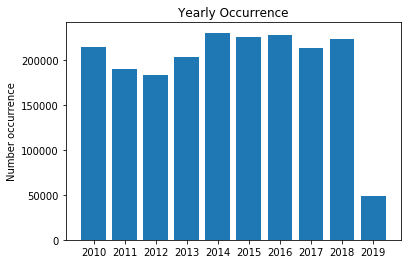

In [21]:
plt.bar(grp_df.index, grp_df["complaint_type"])
plt.xticks(grp_df.index.values)
plt.ylabel('Number occurrence')
plt.title('Yearly Occurrence')
 
plt.show()

## CONCLUDING REMARKS: Department of Housing Preservation and Development of New York City should address HEAT/HOT WATER problem first. There are 1960914 HEAT/HOT WATER incidents total.
